# PCG Heightmap Analysis

This notebook will run an analyis of heightmaps generated procedurally for our Master Thesis. 
The greyscale heightmaps will be imported, and thresholded into N segments based on a KMeans analysis of the image.
Each segment will have it's fractal dimension (Minkowski–Bouligand dimension) measured using the Box Counting method
The N dimensions for each image will then be plotted in 2 dimensions for visual analysis using PCA

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.cluster import KMeans
import os
from os import listdir

In [2]:
path = "img"
suffix = ".png"
print(f'Looking for files ending in: {suffix} in directory : {path}\n')

files = []
for file in os.listdir(path):
    if file.endswith(suffix):
        files.append(file)

print(f'Found {len(files)} files ending with {suffix}.')

Looking for files ending in: .png in directory : img

Found 5 files ending with .png.


In [3]:
#Display sample image

(513, 513, 3)


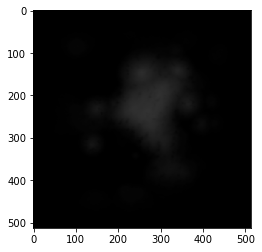

In [4]:
img = cv2.imread(path + '\\' + files[0])
print(img.shape)
imgplot = plt.imshow(img)

## KMeans clustering of heightmaps

```One of the most commonly used clustering algorithms is k-means. Here, the k represents the number of clusters (not to be confused with k-nearest neighbor). Let’s understand how k-means works:

First, randomly select k initial clusters

Randomly assign each data point to any one of the k clusters

Calculate the centers of these clusters

Calculate the distance of all the points from the center of each cluster

Depending on this distance, the points are reassigned to the nearest cluster

Calculate the center of the newly formed clusters

Finally, repeat steps (4), (5) and (6) until either the center of the clusters does not change or we reach the set number of iterations

The key advantage of using k-means algorithm is that it is simple and easy to understand. We are assigning the points to the clusters which are closest to them.```

from https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

In [5]:
# Read the files from disc as images.
# Store the images in an array
# Reshape the images from 3D arrays of (x, y, channels) to 2D arrays of (x*y, channels)

original_images = []
reshaped_images = []
for f in files:
    img = cv2.imread(path + '\\' + f, 0)
    original_images.append(img)
    reshaped_images.append(img.reshape(img.shape[0]*img.shape[1], 1))
print(original_images[0].shape)
print(reshaped_images[0].shape)

(513, 513)
(263169, 1)


In [16]:
# Identify different heightbands as clusters
pic = original_images[0]
pic_n = reshaped_images[0]

k = 10

kmeans = KMeans(n_clusters=k, random_state=0).fit(pic_n)
mean_values = kmeans.cluster_centers_.T[0]
mean_values = np.sort(mean_values, axis=None)
print(mean_values)

pic2show = kmeans.cluster_centers_[kmeans.labels_]

[ 0.11730335  3.1206384   6.20234205 10.95156875 16.20830587 21.93219304
 27.38619329 33.41743929 39.56987824 45.64226759]


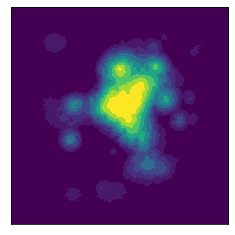

In [7]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1])
plt.imshow(cluster_pic.astype(np.uint8)) # Otherwise it caps at 1
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [10]:
img = original_images[0]
edge_images = []
for i in range (0, len(mean_values)):
    ret,thresh = cv2.threshold(img,mean_values[i],255,cv2.THRESH_BINARY)
    img_c = cv2.Canny(thresh, mean_values[i] - 0.01, mean_values[i] + 0.01)
    edge_images.append(img_c)
    

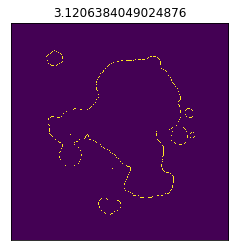

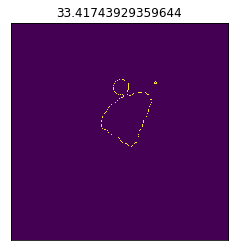

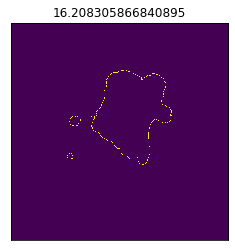

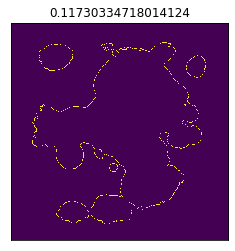

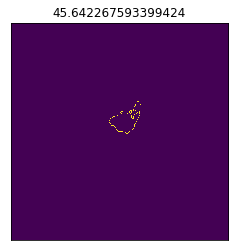

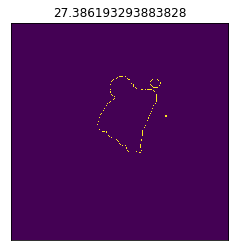

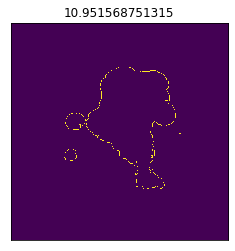

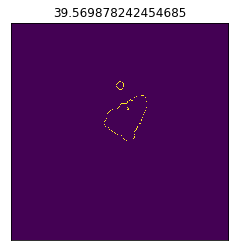

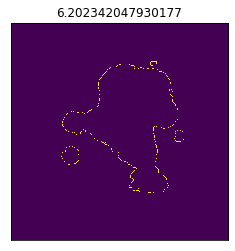

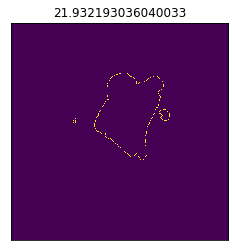

In [11]:
for i in range(0, len(edge_images)):
    plt.imshow(edge_images[i].astype(np.uint8)) # Otherwise it caps at 1
    plt.title(str(mean_values[i]))
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()